### This notebook is used to process the big riblet runs, consolidate all the data/graphs into one notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import string
import matplotlib.patheffects as pe
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [14]:
def collate_all_dataframes(results_directory, delta_t, t_max):
    '''
    for the alpha over time data, need to collate all the individual dataframes into one master one
    '''
    
    t_vals = np.arange(delta_t, t_max+delta_t, delta_t)
    dataframe_list = [] #empty list to store dataframes
    #print(t_vals.size)
    for i in range(t_vals.size):
        t_string = "{:.1f}".format(t_vals[i])
        
        df = pd.read_csv(results_directory+"alpha_data-t="+t_string+".csv")
        df['t'] = t_vals[i]
        dataframe_list.append(df)
        
    master_dataframe = pd.concat(dataframe_list ,ignore_index=True) #collate all the individual dataframes together
    master_dataframe['alpha_normalised'] = master_dataframe['alpha.biofilm']/np.amax(master_dataframe['alpha.biofilm'])
    #master_dataframe['sd'] = 2
    return master_dataframe


def read_drag_data(filepath):
    '''
    reads in the drag dataframes, process the lables and also creates a F_total column from pythogoras of F_x and F_z
    '''
    
    df = pd.read_csv(filepath).rename(columns=lambda x: x.strip()).rename(columns=lambda x: x.strip())
    
    df['F_total'] = np.sqrt(df['F_x']**2 + df['F_y']**2 + df['F_z']**2)
    
    return df


def percent_increase(initial_value, final_value):
    
    return (final_value - initial_value)/np.abs(initial_value)*100.
    
    

In [3]:
delta_t = 0.2 #timestep of sampled data
t_max = 20.

## Collect the drag data

In [4]:
parallelFlow_NOBIOFILM_drag = read_drag_data("riblet_data/integral_results_parallel_NOBIOFILM/drag_over_time.csv")
parallelFlow_14microns_drag = read_drag_data("riblet_data/integral_results_parallel_14microns/drag_over_time.csv")
parallelFlow_28microns_drag = read_drag_data("riblet_data/integral_results_parallel_28microns/drag_over_time.csv")
parallelFlow_50microns_drag = read_drag_data("riblet_data/integral_results_parallel_50microns/drag_over_time.csv")

angle45Flow_NOBIOFILM_drag = read_drag_data("riblet_data/integral_results_45deg_NOBIOFILM/drag_over_time.csv")
angle45Flow_14microns_drag = read_drag_data("riblet_data/integral_results_45deg_14microns/drag_over_time.csv")
angle45Flow_28microns_drag = read_drag_data("riblet_data/integral_results_45deg_28microns/drag_over_time.csv")
angle45Flow_50microns_drag = read_drag_data("riblet_data/integral_results_45deg_50microns/drag_over_time.csv")

angle67Flow_NOBIOFILM_drag = read_drag_data("riblet_data/integral_results_67.5deg_NOBIOFILM/drag_over_time.csv")
angle67Flow_14microns_drag = read_drag_data("riblet_data/integral_results_67.5deg_14microns/drag_over_time.csv")
angle67Flow_28microns_drag = read_drag_data("riblet_data/integral_results_67.5deg_28microns/drag_over_time.csv")
angle67Flow_50microns_drag = read_drag_data("riblet_data/integral_results_67.5deg_50microns/drag_over_time.csv")

perpendicularFlow_NOBIOFILM_drag = read_drag_data("riblet_data/integral_results_perpendicular_NOBIOFILM/drag_over_time.csv")
perpendicularFlow_14microns_drag = read_drag_data("riblet_data/integral_results_perpendicular_14microns/drag_over_time.csv")
perpendicularFlow_28microns_drag = read_drag_data("riblet_data/integral_results_perpendicular_28microns/drag_over_time.csv")
perpendicularFlow_50microns_drag = read_drag_data("riblet_data/integral_results_perpendicular_50microns/drag_over_time.csv")

#these are the perpendicular flow simulations which were run for an additional 10 seconds
#the first 20 seconds of these are identical to the old ones, so we can delete the non-EXTRA data.
#(we can keep the processed data in the riblet_data directory, but delete the big openfoam case directories in PhD/openfoam_results)
perpendicularFlow_14microns_drag_EXTRA = read_drag_data("riblet_data/integral_results_perpendicular_14microns_EXTRA/drag_over_time.csv")
perpendicularFlow_28microns_drag_EXTRA = read_drag_data("riblet_data/integral_results_perpendicular_28microns_EXTRA/drag_over_time.csv")
perpendicularFlow_50microns_drag_EXTRA = read_drag_data("riblet_data/integral_results_perpendicular_50microns_EXTRA/drag_over_time.csv")

#2D drag results
perpendicularFlow_14microns_drag_2D = pd.read_csv("riblet_data/integral_results_perpendicular_14microns_2D/drag_over_time.csv").rename(columns=lambda x: x.strip())
perpendicularFlow_28microns_drag_2D = pd.read_csv("riblet_data/integral_results_perpendicular_28microns_2D/drag_over_time.csv").rename(columns=lambda x: x.strip())
perpendicularFlow_50microns_drag_2D = pd.read_csv("riblet_data/integral_results_perpendicular_50microns_2D/drag_over_time.csv").rename(columns=lambda x: x.strip())


# the values for the drag on the system without biofilm 
# assume the flow has reached steady state by the end of the simulation, so take the last value.
parallelFlow_NOBIOFILM_drag_value = parallelFlow_NOBIOFILM_drag['F_total'].values[-1]
angle45Flow_NOBIOFILM_drag_value = angle45Flow_NOBIOFILM_drag['F_total'].values[-1]
angle67Flow_NOBIOFILM_drag_value = angle67Flow_NOBIOFILM_drag['F_total'].values[-1]
perpendicularFlow_NOBIOFILM_drag_value = perpendicularFlow_NOBIOFILM_drag['F_total'].values[-1]

NOBIOFILM_drag_values = [parallelFlow_NOBIOFILM_drag_value, angle45Flow_NOBIOFILM_drag_value, angle67Flow_NOBIOFILM_drag_value, perpendicularFlow_NOBIOFILM_drag_value]

In [20]:
# the % drag increases as a function of flow angle
angle00_drag_increase = percent_increase(parallelFlow_NOBIOFILM_drag_value, parallelFlow_NOBIOFILM_drag_value)
angle45_drag_increase = percent_increase(parallelFlow_NOBIOFILM_drag_value, angle45Flow_NOBIOFILM_drag_value)
angle67_drag_increase = percent_increase(parallelFlow_NOBIOFILM_drag_value, angle67Flow_NOBIOFILM_drag_value)
angle90_drag_increase = percent_increase(parallelFlow_NOBIOFILM_drag_value, perpendicularFlow_NOBIOFILM_drag_value)

drag_increases = [angle00_drag_increase, angle45_drag_increase, angle67_drag_increase, angle90_drag_increase]
flow_angles = [0., 45., 67.5, 90.]

print(f"% drag increase (0° -> 0°):    {angle00_drag_increase:.2f}%")
print(f"% drag increase (0° -> 45°):   {angle45_drag_increase:.2f}%")
print(f"% drag increase (0° -> 67.5°): {angle67_drag_increase:.2f}%")
print(f"% drag increase (0° -> 90°):   {angle90_drag_increase:.2f}%")

% drag increase (0° -> 0°):    0.00%
% drag increase (0° -> 45°):   6.04%
% drag increase (0° -> 67.5°): 10.19%
% drag increase (0° -> 90°):   81.13%


## Collect the biofilm (alpha) data

In [5]:
parallelFlow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_14microns/", delta_t, t_max)
parallelFlow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_28microns/", delta_t, t_max)
parallelFlow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_50microns/", delta_t, t_max)

angle45Flow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_14microns/", delta_t, t_max)
angle45Flow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_28microns/", delta_t, t_max)
angle45Flow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_50microns/", delta_t, t_max)

angle45Flow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_14microns/", delta_t, t_max)
angle45Flow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_28microns/", delta_t, t_max)
angle45Flow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_50microns/", delta_t, t_max)

angle67Flow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_67.5deg_14microns/", delta_t, t_max)
angle67Flow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_67.5deg_28microns/", delta_t, t_max)
angle67Flow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_67.5deg_50microns/", delta_t, t_max)

perpendicularFlow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_14microns/", delta_t, t_max)
perpendicularFlow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_28microns/", delta_t, t_max)
perpendicularFlow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_50microns/", delta_t, t_max)

perpendicularFlow_14microns_alpha_EXTRA = collate_all_dataframes("riblet_data/alpha_data_perpendicular_14microns_EXTRA/", delta_t, t_max=30.)
perpendicularFlow_28microns_alpha_EXTRA = collate_all_dataframes("riblet_data/alpha_data_perpendicular_28microns_EXTRA/", delta_t, t_max=30.)
perpendicularFlow_50microns_alpha_EXTRA = collate_all_dataframes("riblet_data/alpha_data_perpendicular_50microns_EXTRA/", delta_t, t_max=30.)
#parallelFlow_14microns_alpha

perpendicularFlow_14microns_alpha_2D = collate_all_dataframes("riblet_data/alpha_data_perpendicular2D_14microns/", delta_t=0.5, t_max=60.)
perpendicularFlow_28microns_alpha_2D = collate_all_dataframes("riblet_data/alpha_data_perpendicular2D_28microns/", delta_t=0.5, t_max=60.)
perpendicularFlow_50microns_alpha_2D = collate_all_dataframes("riblet_data/alpha_data_perpendicular2D_50microns/", delta_t=0.5, t_max=60.)

## Group all results by flow angle

Create lists with `[no biofilm drag, with biofilm drag, biofilm over time, biofilm over time (normalised)]`

Each of these elements (apart from `no biofilm drag` is a list containing the corresponding data for 14, 28, 50 microns.

In [6]:
drag_key = 'F_total'
alpha_key = 'alpha.biofilm'
alpha_norm_key = 'alpha_normalised'

#used to access the data from the corresponding dataframes
data_keys = [drag_key, alpha_key, alpha_norm_key]

parallel_flow_drag =             [parallelFlow_14microns_drag,  parallelFlow_28microns_drag,  parallelFlow_50microns_drag]
parallel_flow_alpha =            [parallelFlow_14microns_alpha, parallelFlow_28microns_alpha, parallelFlow_50microns_alpha]
parallel_flow_alpha_normalised = [parallelFlow_14microns_alpha, parallelFlow_28microns_alpha, parallelFlow_50microns_alpha]
parallel_flow_results =          [parallelFlow_NOBIOFILM_drag_value, parallel_flow_drag, parallel_flow_alpha, parallel_flow_alpha_normalised]

angle45_flow_drag =             [angle45Flow_14microns_drag,  angle45Flow_28microns_drag,  angle45Flow_50microns_drag]
angle45_flow_alpha =            [angle45Flow_14microns_alpha, angle45Flow_28microns_alpha, angle45Flow_50microns_alpha]
angle45_flow_alpha_normalised = [angle45Flow_14microns_alpha, angle45Flow_28microns_alpha, angle45Flow_50microns_alpha]
angle45_flow_results =          [angle45Flow_NOBIOFILM_drag_value, angle45_flow_drag, angle45_flow_alpha, angle45_flow_alpha_normalised]

angle67_flow_drag =             [angle67Flow_14microns_drag,  angle67Flow_28microns_drag,  angle67Flow_50microns_drag]
angle67_flow_alpha =            [angle67Flow_14microns_alpha, angle67Flow_28microns_alpha, angle67Flow_50microns_alpha]
angle67_flow_alpha_normalised = [angle67Flow_14microns_alpha, angle67Flow_28microns_alpha, angle67Flow_50microns_alpha]
angle67_flow_results = [angle67Flow_NOBIOFILM_drag_value, angle67_flow_drag, angle67_flow_alpha, angle67_flow_alpha_normalised]

perpendicular_flow_drag =             [perpendicularFlow_14microns_drag,  perpendicularFlow_28microns_drag,  perpendicularFlow_50microns_drag]
perpendicular_flow_alpha =            [perpendicularFlow_14microns_alpha, perpendicularFlow_28microns_alpha, perpendicularFlow_50microns_alpha]
perpendicular_flow_alpha_normalised = [perpendicularFlow_14microns_alpha, perpendicularFlow_28microns_alpha, perpendicularFlow_50microns_alpha]
perpendicular_flow_results =          [perpendicularFlow_NOBIOFILM_drag_value, perpendicular_flow_drag, perpendicular_flow_alpha, perpendicular_flow_alpha_normalised]

# used for plotting 
bf_thickness_labels = ["14 $\mu$m", "28 $\mu$m", "50 $\mu$m"]
thickness_colours = ['#5c00e6', '#e67300', '#009933']
y_axis_titles = ["Drag (N$\\times 10^{-7}$)", 'biomass volume\n($m^3$ $\\times 10^{-11}$)', 'normalised\nbiomass volume']

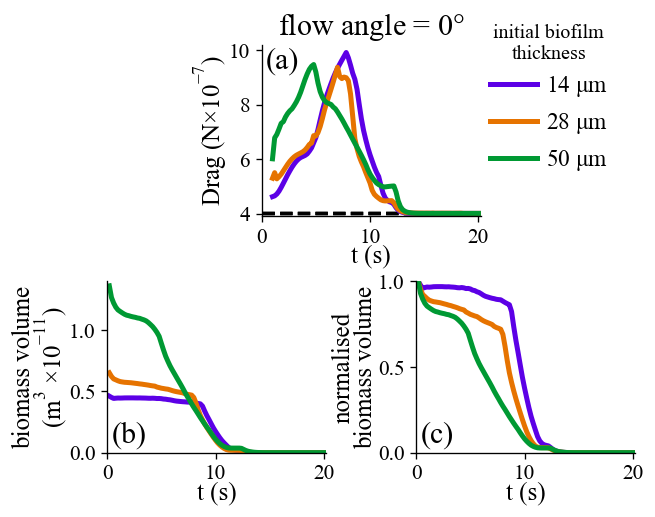

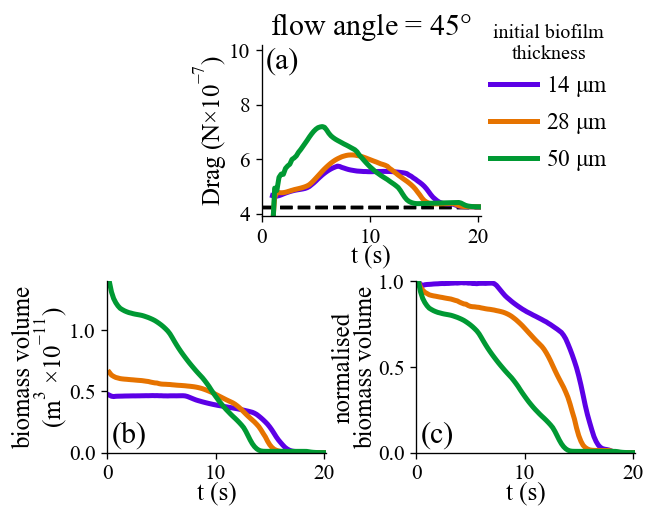

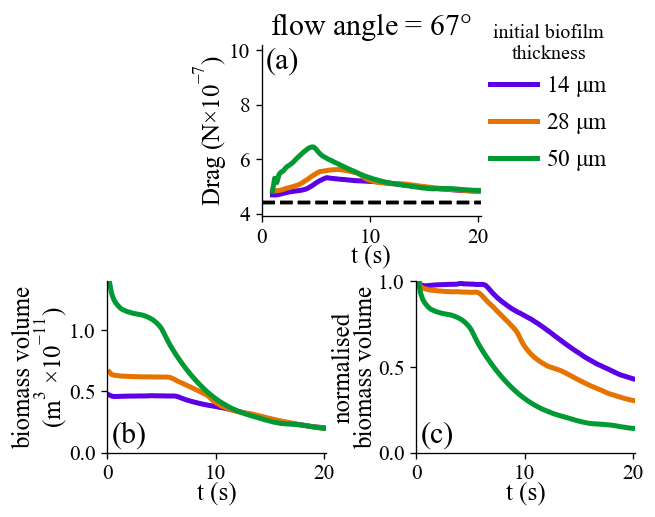

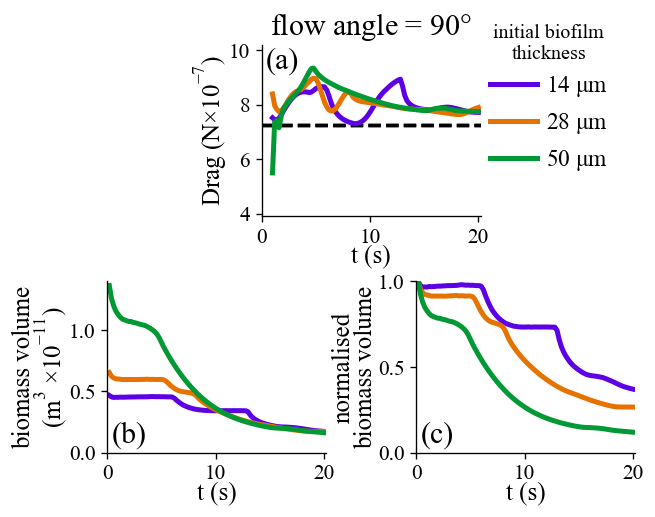

In [41]:
def plot_1x3_flow_angle_results(angle_results, flow_angle, data_keys, y_label_list, line_colours, line_labels, filename):
    '''
    plots a 1x3 plot of the drag, biofilm over time, biofilm over time (normalised) data for each flow angle
    '''
    
    fig = plt.figure(dpi=120)
    fig.set_size_inches(9, 4.5)
    gs = gridspec.GridSpec(2, 6)
    plt.subplots_adjust(wspace=1.4, hspace=0.38)

    #fig.patch.set_facecolor('xkcd:mint green')

    ax_dict = {}
    letters = ['a', 'b', 'c']

    for i in range(0, 3):
        if i > 0:
            ax = plt.subplot(gs[1, 2 * i:2 * i + 2])
            ax.annotate("("+letters[i]+")", xy=(0.02, 0.18), xycoords='axes fraction', fontsize=18, horizontalalignment='left', verticalalignment='top')
        else:
            ax = plt.subplot(gs[0, 2 * i - 3:2 * i + 2 - 3])
            ax.annotate("("+letters[i]+")", xy=(0.02, 0.986), xycoords='axes fraction', fontsize=18, horizontalalignment='left', verticalalignment='top')
        
        ax_dict[letters[i]] = ax
        #ax.annotate("("+letters[i]+")", xy=(0.02, 0.986), xycoords='axes fraction', fontsize=16, horizontalalignment='left', verticalalignment='top')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    labelSize = 15
    titleSize = 18
    numberSize = 12.8
    legendSize = 14
    
    plot_t0 = 1. #first time point plotted.  used to remove the noise from the initial biofilm budding
    i = 0 #index used to keep track of which subplot we're on
    
    #plt.ticklabel_format(style='sci', axis='y', scilimits=(-7,-6))
    
    for letter, df_list, data_key, y_label  in zip(letters, angle_results[1:], data_keys, y_label_list):
        
        #print(ax_dict.keys())
        ax = ax_dict[letter]
        
        for df, line_colour, line_label in zip(df_list, line_colours, line_labels):
            if data_key in ['alpha.biofilm', 'alpha_normalised']:
                ax.plot(df['t'], df[data_key], lw=3., c=line_colour, label=line_label)

            if data_key not in ['alpha.biofilm', 'alpha_normalised']:
                ax.plot(df['t'][df['t']>=plot_t0], df[data_key][df['t']>=plot_t0], lw=3., c=line_colour, label=line_label)
                ax.axhline(angle_results[0], lw=2., color='k', ls="--", zorder=-10)
                
                leg = ax.legend(fontsize=legendSize, handletextpad=0.4, frameon=False, loc=(1., 0.2))
                leg.set_title('initial biofilm\nthickness', prop={'size': 12})
                leg.get_title().set_multialignment('center')
                
                ax.ticklabel_format(axis='y', style='sci', scilimits=(-7,-7))
                ax.set_title(f'flow angle = {flow_angle}', fontsize=titleSize)
                ax.set_ylim(3.9e-7, 10.2e-7)
                
            if data_key in ['alpha_normalised']:
                ax.set_ylim(0, 1.)
                ax.yaxis.set_major_locator(plt.MaxNLocator(2))
                
            if data_key in ['alpha.biofilm']:
                ax.set_ylim(0, 1.4e-11)
            
            
        ax.set_xlabel('t (s)', fontsize=labelSize, labelpad=-2)
        ax.set_ylabel(y_label, fontsize=labelSize, labelpad=-0, linespacing=0.88)


        ax.tick_params(axis='both', which='major', labelsize=numberSize)
        ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)
        ax.set_xlim(0, 20.2)
        
        
        i += 1
        
        
        
    plt.savefig(f'riblet_plots/{filename}.pdf', bbox_inches='tight', dpi=330)
    plt.show()
    
    
    
    
plot_1x3_flow_angle_results(parallel_flow_results, '$0\degree$', data_keys, y_axis_titles, thickness_colours, bf_thickness_labels, '0_degree_flow_results')
plot_1x3_flow_angle_results(angle45_flow_results, '$45\degree$', data_keys, y_axis_titles, thickness_colours, bf_thickness_labels, '45_degree_flow_results')
plot_1x3_flow_angle_results(angle67_flow_results, '$67\degree$', data_keys, y_axis_titles, thickness_colours, bf_thickness_labels, '67_degree_flow_results')
plot_1x3_flow_angle_results(perpendicular_flow_results, '$90\degree$', data_keys, y_axis_titles, thickness_colours, bf_thickness_labels, '90_degree_flow_results')

## Plot the % drag increase relative to parallel flow

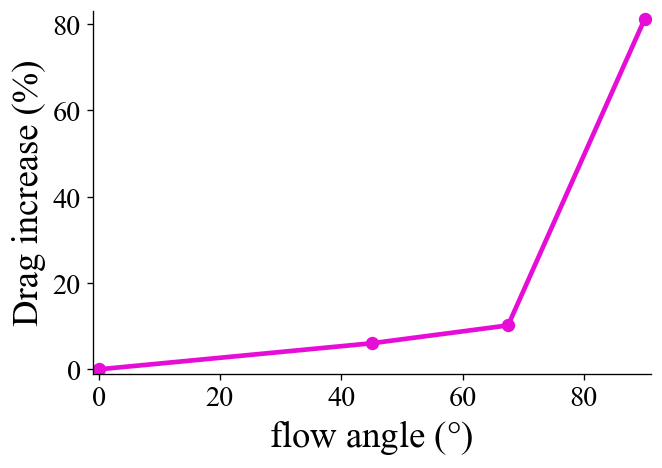

In [42]:
fig, ax = plt.subplots(dpi=120)
fig.set_size_inches(6, 4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(flow_angles, drag_increases, marker='o', markersize=7, lw=2.8, c='#e60ed7')

ax.tick_params(axis='both', which='major', labelsize=17)

ax.set_xlabel("flow angle ($\degree$)", fontsize=22)
ax.set_ylabel("Drag increase (%)", fontsize=22)
ax.set_xlim(-1, 91)
ax.set_ylim(-1, 83)

plt.savefig('riblet_plots/drag_percent_increase.pdf', dpi=330, bbox_inches='tight')


plt.show()

# Below this is outdated

In [43]:
bf_thickness_labels = ["14 $\mu$m", "28 $\mu$m", "50 $\mu$m"]
drag_angle_labels = ["$0\degree$", "$45\degree$", "$90\degree$"]
thickness_colours = ['#5c00e6', '#e67300', '#009933']
parallelDrag_key = "F_total"
angle45Drag_key = "F_total"
angle67Drag_key = "F_total"
perpendicularDrag_key = "F_total"

In [44]:
#group the drag dataframes together by flow direction
#each entry is a tuple containing the dataframe and the key needed for the relevant drag entry
dragDataframes_parallelFlow = [(parallelFlow_14microns_drag, parallelDrag_key), (parallelFlow_28microns_drag, parallelDrag_key), (parallelFlow_50microns_drag, parallelDrag_key)]
dragDataframes_angle45Flow = [(angle45Flow_14microns_drag, angle45Drag_key), (angle45Flow_28microns_drag, angle45Drag_key), (angle45Flow_50microns_drag, angle45Drag_key)]
dragDataframes_angle67Flow = [(angle67Flow_14microns_drag, angle67Drag_key), (angle67Flow_28microns_drag, angle67Drag_key), (angle67Flow_50microns_drag, angle67Drag_key)]
dragDataframes_perpendicularFlow = [(perpendicularFlow_14microns_drag, perpendicularDrag_key), (perpendicularFlow_28microns_drag, perpendicularDrag_key), (perpendicularFlow_50microns_drag, perpendicularDrag_key)]
#dragDataframes_perpendicularFlow_EXTRA = [(perpendicularFlow_14microns_drag_EXTRA, perpendicularDrag_key), (perpendicularFlow_28microns_drag, perpendicularDrag_key), (perpendicularFlow_50microns_drag, perpendicularDrag_key)]
dragDataframes_perpendicularFlow_2D = [perpendicularFlow_14microns_drag_2D, perpendicularFlow_28microns_drag_2D, perpendicularFlow_50microns_drag_2D]

#group the drag dataframes together by biofilm thickness
#each entry is a tuple containing the dataframe and the key needed for the relevant drag entry
dragDataFrames_14microns = [(parallelFlow_14microns_drag, parallelDrag_key), (angle45Flow_14microns_drag, angle45Drag_key), (perpendicularFlow_14microns_drag, perpendicularDrag_key)]
dragDataFrames_28microns = [(parallelFlow_28microns_drag, parallelDrag_key), (angle45Flow_28microns_drag, angle45Drag_key), (perpendicularFlow_28microns_drag, perpendicularDrag_key)]
dragDataFrames_50microns = [(parallelFlow_50microns_drag, parallelDrag_key), (angle45Flow_50microns_drag, angle45Drag_key), (perpendicularFlow_50microns_drag, perpendicularDrag_key)]

In [45]:
# parallelFlow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_14microns/", delta_t, t_max)
# parallelFlow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_28microns/", delta_t, t_max)
# parallelFlow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_50microns/", delta_t, t_max)

# angle45Flow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_14microns/", delta_t, t_max)
# angle45Flow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_28microns/", delta_t, t_max)
# angle45Flow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_50microns/", delta_t, t_max)

# perpendicularFlow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_14microns/", delta_t, t_max)
# perpendicularFlow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_28microns/", delta_t, t_max)
# perpendicularFlow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_50microns/", delta_t, t_max)

# perpendicularFlow_14microns_alpha_EXTRA = collate_all_dataframes("riblet_data/alpha_data_perpendicular_14microns_EXTRA/", delta_t, t_max=30.)
# perpendicularFlow_28microns_alpha_EXTRA = collate_all_dataframes("riblet_data/alpha_data_perpendicular_28microns_EXTRA/", delta_t, t_max=30.)
# perpendicularFlow_50microns_alpha_EXTRA = collate_all_dataframes("riblet_data/alpha_data_perpendicular_50microns_EXTRA/", delta_t, t_max=30.)
# #parallelFlow_14microns_alpha

# perpendicularFlow2D_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular2D_14microns/", delta_t=0.5, t_max=60.)
# perpendicularFlow2D_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular2D_28microns/", delta_t=0.5, t_max=60.)
# perpendicularFlow2D_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular2D_50microns/", delta_t=0.5, t_max=60.)

In [48]:
#group the biofilm dataframes together by flow direction
alphaDataframes_parallelFlow = [parallelFlow_14microns_alpha, parallelFlow_28microns_alpha, parallelFlow_50microns_alpha]
alphaDataframes_angle45Flow = [angle45Flow_14microns_alpha, angle45Flow_28microns_alpha, angle45Flow_50microns_alpha]
alphaDataframes_perpendicularFlow = [perpendicularFlow_14microns_alpha, perpendicularFlow_28microns_alpha, perpendicularFlow_50microns_alpha]
alphaDataframes_perpendicularFlow_EXTRA = [perpendicularFlow_14microns_alpha_EXTRA, perpendicularFlow_28microns_alpha_EXTRA, perpendicularFlow_50microns_alpha_EXTRA]

#group the biofilm dataframes together by biofilm thickness
alphaDataFrames_14microns = [parallelFlow_14microns_alpha, angle45Flow_14microns_alpha, perpendicularFlow_14microns_alpha]
alphaDataFrames_28microns = [parallelFlow_28microns_alpha, angle45Flow_28microns_alpha, perpendicularFlow_28microns_alpha]
alphaDataFrames_50microns = [parallelFlow_50microns_alpha, angle45Flow_50microns_alpha, perpendicularFlow_50microns_alpha]

alphaDataframes_perpendicularFlow2D = [perpendicularFlow_14microns_alpha_2D, perpendicularFlow_28microns_alpha_2D, perpendicularFlow_50microns_alpha_2D]

In [49]:
def plot1x3DragcomparisonPlots(df_group1, df_group2, df_group3, baseline_vals, label_list, title_list, filename):
    '''
    makes a 3x1 subplot plot. each subplot contains 3 lines, with a different variable on each subplot
    
    e.g., all the drags for each bf thickness, parallel flow on one subplot, then 45 deg flow on the next subplot, then perpendicular on last one.
    
    '''
    
    fig, axs = plt.subplots(1,3, dpi=220, sharey=True)
    #plt.subplots_adjust(wspace=20)
    fig.set_size_inches(8,2.8)
    plt.subplots_adjust(wspace=0.15)
    
    labelSize = 18
    titleSize = 18
    numberSize = 16
    legendSize = 9.5
    
    plot_t0 = 1. #first time point plotted.  used to remove the noise from the initial biofilm budding
    i = 0 #index used to keep track of which subplot we're on
    
    df_group_list = [df_group1, df_group2, df_group3]
    letters = list(string.ascii_lowercase)[:len(df_group_list)] #letters used for labelling subplots
    
    for ax, df_group_and_key, baseline_val, title, letter in zip(axs.flat, df_group_list, baseline_vals, title_list, letters):
        
        #horizontal line representing drag without any biofilm
        ax.axhline(baseline_val, lw=2., color='k', ls="--")
        
        for df, df_key, label, line_colour in zip(*zip(*df_group_and_key[::-1]), label_list[::-1], thickness_colours[::-1]):
            
            
            
            ax.plot(df["t"][df['t'] >= plot_t0], df[df_key][df['t'] >= plot_t0], label=label, lw=3.3, color=line_colour)
            
            ax.set_title(title, fontsize=titleSize)
            ax.set_ylabel("Drag (N$\\times 10^{-7}$)", fontsize=labelSize, labelpad=-1)
            ax.set_xlabel("time (s)", fontsize=labelSize, labelpad=-3)
            
            if i < 2: ax.text(0.845, 0.035, "("+letter+")", transform=ax.transAxes, fontsize=16)
            else: ax.text(0.845, 0.91, "("+letter+")", transform=ax.transAxes, fontsize=16)
            
            ax.tick_params(axis='both', which='major', labelsize=numberSize)
            ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)
            
            handles, labels = ax.get_legend_handles_labels()
            #ax.legend(handles[::-1], labels[::-1], fontsize=8.5, loc="best")
            ax.legend(fontsize=legendSize, loc="best")
            ax.label_outer()
            ax.set_xlim(0, 20.2)
            #ax.set_ylim(2.8e-7, 8e-7)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
        
        i+=1
    
    

    plt.savefig("riblet_plots/"+filename+".pdf", bbox_inches="tight", dpi=330)
    plt.show()
    

In [50]:
plot1x3DragcomparisonPlots(dragDataframes_parallelFlow, dragDataframes_angle45Flow, dragDataframes_perpendicularFlow, NOBIOFILM_drag_vals, bf_thickness_labels, drag_angle_labels, "drag_vs_angle")

NameError: name 'NOBIOFILM_drag_vals' is not defined

In [ ]:
# plot3x1DragcomparisonPlots(dragDataFrames_14microns, dragDataFrames_28microns, dragDataFrames_50microns, label_list=drag_angle_labels, title_list=bf_thickness_labels, filename="drag_vs_bfThickness")

In [ ]:
def plot1x3AlphaComparisonPlots(df_group1, df_group2, df_group3, label_list, title_list, normalised, filename):
    '''
    same sort of method as the drag plots above but for the alpha (biofilm) plots.
    this method takes the argument "normalised" which is a boolean value which says whether we're doing the normalised alpha plots or not
    '''
    
    fig, axs = plt.subplots(1,3, dpi=220, sharey=True)
    fig.set_size_inches(8,3)
    
    labelSize=16
    titleSize=18
    numbersize = 14
    
    if normalised:
        df_key = "alpha_normalised"
        #y_label = "$\\alpha / \\alpha_\max$"
        y_label = "normalised \n biomass volume"
        
    else:
        df_key = "alpha.biofilm"
        #y_label = "volume of $\\alpha$ (m$^3$ $\\times 10^{-11}$)"
        y_label = "biomass volume \n (m$^3$ $\\times 10^{-11}$)"
        
    
    df_group_list = [df_group1, df_group2, df_group3]
    letters = list(string.ascii_lowercase)[:len(df_group_list)] #letters used for labelling subplots
    i = 0 #index used to keep track of which subplot we're on
    
    for ax, df_group_and_key, title, letter in zip(axs.flat, df_group_list, title_list, letters):
        
        for df, label, line_colour in zip(df_group_and_key, label_list, thickness_colours):
            
            ax.plot(df["t"], df[df_key], label=label, lw=3.3, color=line_colour)
            
            ax.set_title(title, fontsize=titleSize)
            ax.set_ylabel(y_label, fontsize=labelSize)
            ax.set_xlabel("time (s)", fontsize=labelSize)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
#             ax.text(0.015, 0.03, "("+letter+")", transform=ax.transAxes, fontsize=14)
            
            ax.tick_params(axis='both', which='major', labelsize=numbersize)
            ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)
            
            handles, labels = ax.get_legend_handles_labels()
#             ax.legend(handles[::-1], labels[::-1], fontsize=8.5, loc="best", framealpha=0.6)
            ax.label_outer()
            
            if normalised: 
                
                ax.set_ylim(0., 1.)
                ax.legend(handles[::], labels[::], fontsize=8.5, loc="best", framealpha=0.6)
                
                if i > 0:
                    ax.text(0.83, 0.91, "("+letter+")", transform=ax.transAxes, fontsize=16)
                else:
                    ax.text(0.015, 0.03, "("+letter+")", transform=ax.transAxes, fontsize=16)
            
            else:
                
                ax.set_ylim(-0.05e-11, 1.5e-11)
                ax.legend(handles[::-1], labels[::-1], fontsize=10, loc="best", framealpha=0.6)
                ax.text(0.015, 0.03, "("+letter+")", transform=ax.transAxes, fontsize=16)
        
        i += 1
    
    plt.subplots_adjust(wspace=0.15)
    if normalised: plt.locator_params(axis='y', nbins=3)
    else: plt.locator_params(axis='y', nbins=5)
        
    plt.savefig("riblet_plots/"+filename+".pdf", bbox_inches="tight", dpi=330)
    plt.show()

In [ ]:
plot1x3AlphaComparisonPlots(alphaDataframes_parallelFlow, alphaDataframes_angle45Flow, alphaDataframes_perpendicularFlow, bf_thickness_labels, drag_angle_labels, 
                            normalised=False, filename="alpha_vs_angle")

In [ ]:
plot1x3AlphaComparisonPlots(alphaDataframes_parallelFlow, alphaDataframes_angle45Flow, alphaDataframes_perpendicularFlow, bf_thickness_labels, drag_angle_labels, 
                            normalised=True, filename="alpha_vs_angle_NORMALISED")

In [ ]:
def plot2x3AlphaComparisonPlot(df_group1, df_group2, df_group3, label_list, title_list, filename):
    '''
    Plot both the non-normalised and normalised biomass over time plots together
    '''
    
    fig, axs = plt.subplots(2,3, dpi=220, sharex=True, sharey='row')
    fig.set_size_inches(8,6)
    plt.subplots_adjust(wspace=0.17, hspace=0.16)
    
    labelSize = 18
    titleSize = 18
    numbersize = 16
    legendsize = 9.5
    
    # plot the regular, then the normalised
    df_key_list = ['alpha.biofilm']*3 + ['alpha_normalised']*3
    y_label_list = ['biomass volume\n(m$^3$ $\\times 10^{-11}$)']*3 + ['normalised\nbiomass volume']*3
    df_group_list = [df_group1, df_group2, df_group3]*2#, df_group1, df_group2, df_group3]
    letters = list(string.ascii_lowercase)[:len(df_group_list)] #letters used for labelling subplots
    title_list = title_list*2
    i = 0 #index used to keep track of which subplot we're on
    
    #print(df_group1)
    
    for ax, df_group, df_key, letter, y_label, title in zip(axs.flat, df_group_list, df_key_list, letters, y_label_list, title_list):
        
        for df, label, line_colour in zip(df_group, label_list, thickness_colours):
            
            #print(type(df))
            
            ax.plot(df["t"], df[df_key], label=label, lw=3.3, color=line_colour)
            
            if i < 3: ax.set_title(title, fontsize=titleSize)
            ax.set_ylabel(y_label, fontsize=labelSize)
            ax.set_xlabel("time (s)", fontsize=labelSize, labelpad=-2)
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
#             ax.text(0.015, 0.03, "("+letter+")", transform=ax.transAxes, fontsize=14)
            
            ax.tick_params(axis='both', which='major', labelsize=numbersize)
            ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)
            
            handles, labels = ax.get_legend_handles_labels()
#             ax.legend(handles[::-1], labels[::-1], fontsize=8.5, loc="best", framealpha=0.6)
            ax.label_outer()
            ax.set_xlim(0, 20)
    
    
            
            if i > 3:  
                ax.set_ylim(0., 1.05)
                ax.legend(handles[::], labels[::], fontsize=legendsize, loc="best", framealpha=0.3)
                
                if i > 0:
                    ax.text(0.83, 0.91, "("+letter+")", transform=ax.transAxes, fontsize=16)
                else:
                    ax.text(0.015, 0.04, "("+letter+")", transform=ax.transAxes, fontsize=16)
            
            else:
                ax.set_ylim(-0.01e-11, 1.5e-11)
                ax.legend(handles[::-1], labels[::-1], fontsize=legendsize, loc="best", framealpha=0.3)
                ax.text(0.015, 0.04, "("+letter+")", transform=ax.transAxes, fontsize=16)
        
        i += 1
    
    
#     if normalised: plt.locator_params(axis='y', nbins=3)
#     else: plt.locator_params(axis='y', nbins=5)
        
    plt.savefig("riblet_plots/"+filename+".pdf", bbox_inches="tight", dpi=330)
    plt.show()

In [ ]:
plot2x3AlphaComparisonPlot(alphaDataframes_parallelFlow, alphaDataframes_angle45Flow, alphaDataframes_perpendicularFlow, bf_thickness_labels, drag_angle_labels, 
                           filename="alpha_vs_angle_DOUBLE")

In [ ]:
#plot the extended perpendicular flow simulations for alpha (normalised)
labelSize=20
titleSize=18
fig, ax = plt.subplots(dpi=320)
fig.set_size_inches(6,4)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for df, line_label, line_colour in zip(alphaDataframes_perpendicularFlow_EXTRA, bf_thickness_labels, thickness_colours):
    ax.plot(df['t'], df['alpha_normalised'], label=line_label, lw=4, c=line_colour)
    
ax.set_title("biomass removal\n($90\degree$ flow, extended)", fontsize=titleSize)
ax.set_ylabel("normalised \n biomass volume", fontsize=labelSize)
ax.set_xlabel("time (s)", fontsize=labelSize)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylim(0,1)
plt.legend()
plt.locator_params(axis='y', nbins=3)
plt.savefig("riblet_plots/alphaNormalised_perpendicular_EXTRA.pdf", bbox_inches='tight')
plt.show()

In [ ]:
#plot the extended perpendicular flow simulations for alpha
#plot the extended perpendicular flow simulations for alpha (normalised)
labelSize=20
titleSize=18
numbersize = 16
legendsize = 12
fig, axarr = plt.subplots(1, 2, dpi=220)
fig.set_size_inches(8,3)
plt.subplots_adjust(wspace=0.44)

letters = ['a', 'b']
df_key_list = ['alpha.biofilm', 'alpha_normalised']
y_label_list = ['biomass volume\n(m$^3$ $\\times 10^{-11}$)', 'normalised\nbiomass volume']

#print(alphaDataframes_perpendicularFlow_EXTRA)

i = 0
for ax, df_key, y_label, letter in zip(axarr.flatten(), df_key_list, y_label_list, letters):
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    for df, line_label, line_colour in zip(alphaDataframes_perpendicularFlow_EXTRA, bf_thickness_labels, thickness_colours):
        
        ax.plot(df['t'], df[df_key], label=line_label, lw=4, c=line_colour)
        
    handles, labels = ax.get_legend_handles_labels()
    if not i: 
        ax.legend(handles[::-1], labels[::-1], fontsize=legendsize, loc="best", framealpha=0.3)
        ax.set_ylim(-0.05e-11, 1.5e-11)
    else: 
        ax.legend(fontsize=legendsize, loc="best", framealpha=0.3)
        ax.set_ylim(-0.02,1.08)
    
    ax.set_ylabel(y_label, fontsize=labelSize, labelpad=-1)
    ax.set_xlabel("time (s)", fontsize=labelSize, labelpad=-1)
    ax.tick_params(axis='both', which='major', labelsize=numbersize)
    ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)
    ax.set_xlim(0, 30)
    
    ax.text(0.01, 0.04, "("+letter+")", transform=ax.transAxes, fontsize=20)

    i += 1

plt.savefig("riblet_plots/alpha_perpendicular_EXTRA.pdf", bbox_inches='tight', dpi=330)
plt.show()

In [ ]:
#times chosen as features in the plot
times_of_interest = np.array([9.6, 12., 13.2, 15])

In [ ]:
#plot the extended perpendicular flow simulations for alpha
labelSize=28
titleSize=24
numbersize=20
fig, ax = plt.subplots(dpi=220)
fig.set_size_inches(6,4)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(perpendicularFlow_14microns_alpha_EXTRA['t'], perpendicularFlow_14microns_alpha_EXTRA['alpha_normalised'], label=line_label, lw=5, zorder=1, c=thickness_colours[0])

indices_of_interest = np.isin(perpendicularFlow_14microns_alpha_EXTRA['t'], times_of_interest)

ax.scatter(times_of_interest, perpendicularFlow_14microns_alpha_EXTRA['alpha_normalised'][indices_of_interest], s=120, zorder=2, c='#e60000')
    
ax.set_title("biomass removal\n($90\degree$ flow, 14 $\mu$m)", fontsize=titleSize)
ax.set_ylabel("normalised\nbiomass volume", fontsize=labelSize, labelpad=-1)
ax.set_xlabel("time (s)", fontsize=labelSize, labelpad=-1)
ax.tick_params(axis='both', which='major', labelsize=numbersize)
ax.set_ylim(0,1)
ax.set_xlim(0, 30)
plt.locator_params(axis='y', nbins=3)
plt.savefig("riblet_plots/alphaNormalised_perpendicular_EXTRA_14microns.pdf", bbox_inches='tight', dpi=330)
plt.show()

In [ ]:
plt.plot(parallelFlow_NOBIOFILM_drag['t'], parallelFlow_NOBIOFILM_drag['F_z'], label='par')
plt.plot(angle45Flow_NOBIOFILM_drag['t'], angle45Flow_NOBIOFILM_drag['F_total'], label='45')
plt.plot(perpendicularFlow_NOBIOFILM_drag['t'], perpendicularFlow_NOBIOFILM_drag['F_x'], label='perp')
plt.legend()
plt.show()

NameError: name 'alphaDataframes_perpendicularFlow2D' is not defined

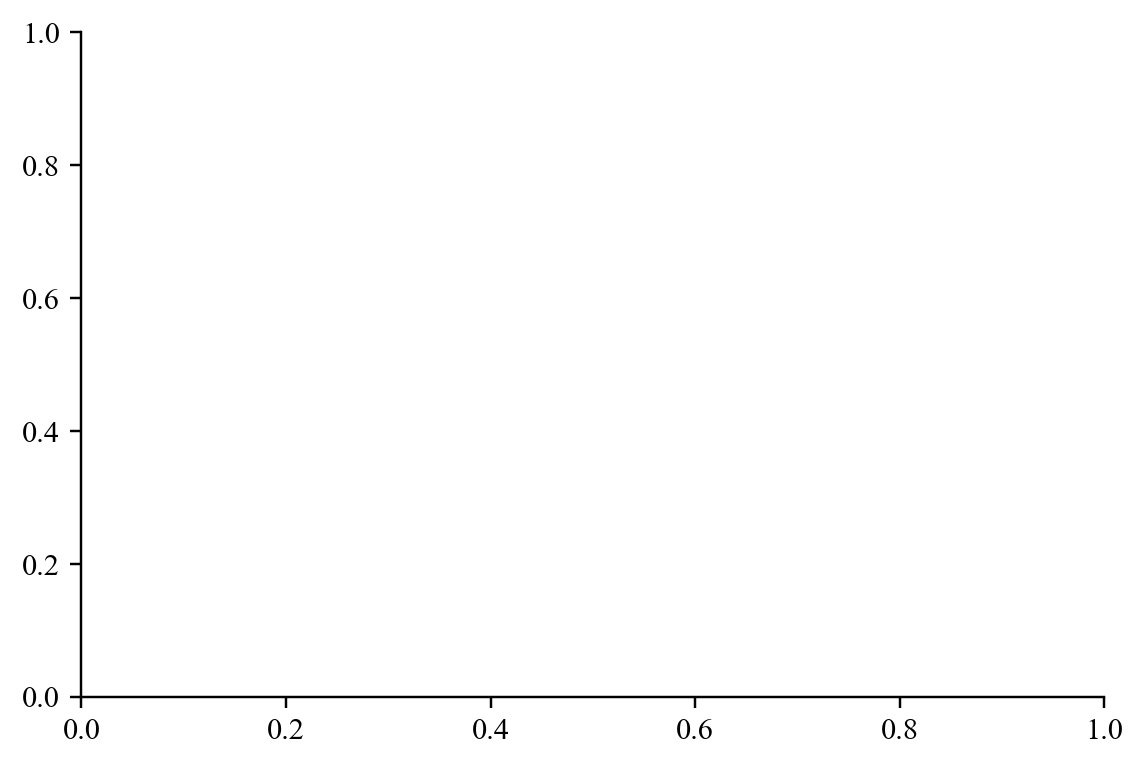

In [47]:
#plot the 2D perpendicular flow simulations for alpha (normalised)
labelSize=28
titleSize=24
numbersize=20
legendsize=14

fig, ax = plt.subplots(dpi=220)
fig.set_size_inches(6,4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for df, line_label, line_colour in zip(alphaDataframes_perpendicularFlow2D, bf_thickness_labels, thickness_colours):
    ax.plot(df['t'], df['alpha_normalised'], label=line_label, lw=4, c=line_colour)
    
#ax.set_title("biomass removal\n($90\degree$ flow, extended)", fontsize=titleSize)
ax.set_ylabel("normalised \n biomass volume", fontsize=labelSize, labelpad=-1)
ax.set_xlabel("time (s)", fontsize=labelSize, labelpad=-1)
ax.tick_params(axis='both', which='major', labelsize=numbersize)
ax.set_ylim(0,1)
ax.set_xlim(0, 60)
ax.legend(fontsize=legendsize, loc="best")
plt.locator_params(axis='y', nbins=3)
plt.savefig("riblet_plots/alphaNormalised_perpendicular2D.pdf", bbox_inches='tight', dpi=330)
plt.show()

In [ ]:
#plot the 2D perpendicular flow simulations for alpha
labelSize=28
titleSize=24
numbersize=20
legendsize=14

fig, ax = plt.subplots(dpi=220)
fig.set_size_inches(6,4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for df, line_label, line_colour in zip(alphaDataframes_perpendicularFlow2D, bf_thickness_labels, thickness_colours):
    ax.plot(df['t'], df['alpha.biofilm'], label=line_label, lw=4, c=line_colour)
    
#ax.set_title("Biomass removal\n($90\degree$ flow, extended)", fontsize=titleSize)
ax.set_ylabel("biomass volume \n (m$^3$ $\\times 10^{-11}$)", fontsize=labelSize, labelpad=-1)
ax.set_xlabel("time (s)", fontsize=labelSize, labelpad=-1)
ax.tick_params(axis='both', which='major', labelsize=numbersize)
ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)

plt.locator_params(axis='y', nbins=6)


ax.set_ylim(-0.05e-11, 1.5e-11)
ax.set_xlim(0, 60)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=legendsize, loc="best", framealpha=0.3)

plt.savefig("riblet_plots/alpha_perpendicular2D.pdf", bbox_inches='tight', dpi=330)
plt.show()

In [ ]:
#plot the extended perpendicular flow simulations for drag
labelSize=28
titleSize=24
numbersize=20
legendsize=14
fig, ax = plt.subplots(dpi=220)
fig.set_size_inches(6,4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for df, line_label, line_colour in zip(dragDataframes_perpendicularFlow_2D, bf_thickness_labels, thickness_colours):
    ax.plot(df['t'], df['F_x'], label=line_label, lw=4, c=line_colour)
    
#ax.set_title("2D Drag profile", fontsize=titleSize)
ax.set_ylabel("Force (N $\\times 10^{-6}$)", fontsize=labelSize, labelpad=-1)
ax.set_xlabel("time (s)", fontsize=labelSize, labelpad=-1)
ax.tick_params(axis='both', which='major', labelsize=numbersize)
ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)
ax.set_xlim(0, 60)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=legendsize, loc="best")
plt.locator_params(axis='y', nbins=6)
plt.savefig("riblet_plots/perpFlow_2D_drag.pdf", bbox_inches='tight', dpi=330)
plt.show()

In [ ]:
k1 = "a"
k2 = "b"

klist = [k1]*3 + [k2]*3

klist*2

In [ ]:
fig = plt.figure(dpi=120)
fig.set_size_inches(9, 4.5)
gs = gridspec.GridSpec(2, 6)
plt.subplots_adjust(wspace=0.6, hspace=0.3)

#fig.patch.set_facecolor('xkcd:mint green')

ax_dict = {}
letters = ['a', 'b', 'c']

for i in range(0, 3):
    if i > 0:
        ax = plt.subplot(gs[1, 2 * i:2 * i + 2])
    else:
        ax = plt.subplot(gs[0, 2 * i - 3:2 * i + 2 - 3])
        
    ax_dict[letters[i]] = ax
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.986), xycoords='axes fraction', fontsize=16, horizontalalignment='left', verticalalignment='top')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [ ]:
fig = plt.figure(dpi=120)
fig.set_size_inches(9, 4.5)
gs = gridspec.GridSpec(2, 6)

ax_dict = {}
letters = ['a', 'b', 'c']
plt.subplots_adjust(wspace=0., hspace=0.3)

for i in range(0, 3):
    if i < 2:
        ax = plt.subplot(gs[1, (3*i):(2*i)+2])
    else:
        ax = plt.subplot(gs[0, 2 * i - 3:2 * i + 2 - 3])
        
    ax_dict[letters[i]] = ax
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.986), xycoords='axes fraction', fontsize=16, horizontalalignment='left', verticalalignment='top')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)